# Classification Models on Our Dataset from the Previous Project
#### Authors: Rahul Gupta & Maddie Subramanian
Using the dataset from our previous project, we will first perform data preprocessing before moving on to apply the following classification models and measure their accuracy: Naïve Bayes, Decision Tree (DT), K-Nearest Neighbor (KNN), Support Vector Machines (SVM), and Logistic Regression (Logit).

The dataset we used in the last project (linear regression project) was a housing dataset that contained data consisting of house prices and factors that influenced house prices such as average area income, area population, and more.

## Data Preprocessing - Rahul
Before applying the models, we need to preprocess the data and modify it so it will fit the classification models, since the housing data has mainly continuous data. We will need to perform standard preprocessing steps and then move on to converting from continuous to categorical.

### Reading the Data
First we need to read the data and load it into a pandas dataframe so we can preprocess and then apply models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

housing_df = pd.read_csv(r'C:\Users\maddi\Downloads\Housing.csv')
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Dropping Columns & Missing Values
In the last project using this dataset, we determined that house addresses would not have a significant influence on house prices and could be dropped, so we will be doing this again.

We will also check and deal with missing values. Just like last time, there are no missing values.

In [2]:
# Drop column
housing_df = housing_df.drop('Address', axis=1)

# Check for missing values
missing_values = housing_df.isna().sum()
print(missing_values)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


### Z-Score Normalization & Outliers
We will normalize the dataset and remove any outliers, turning values into z scores.

In [3]:
# Normalize
normal_df = (housing_df - housing_df.mean())/housing_df.std()

# Remove Outliers
normal_df = normal_df.loc[((normal_df > -3).sum(axis=1)==6) & ((normal_df <= 3).sum(axis=1)==6)]

print('Entries before outliers = %d' % (housing_df.shape[0]))
print('Entries after outliers = %d' % (normal_df.shape[0]))
print('Entries removed = %d' % (housing_df.shape[0] - normal_df.shape[0]))

Entries before outliers = 5000
Entries after outliers = 4943
Entries removed = 57


### Discretization
In this step, we will use bins and labels to turn continuous data into categorical data so we can use it to fit the classification models. This will group continuous data into bins and assign that bin an appropriate label.

In [4]:
# Define bin edges
bins = [-3, -1.5, 0, 1.5, 3]

# Define labels for each bin
labels = ['Low Price', 'Medium Price', 'High Price', 'Very High Price']

# Discretize the Price column into categories
normal_df['Price Category'] = pd.cut(normal_df['Price'], bins=bins, labels=labels)

# Display the first few rows
print(normal_df[['Price', 'Price Category']].head())

      Price Price Category
0 -0.490032   Medium Price
1  0.775431     High Price
2 -0.490162   Medium Price
3  0.080835     High Price
4 -1.702348      Low Price


### Training and Testing Split
We will split the data just like in the regression project. The price category is what we want to predict, hence why it is the y value. All other attributes, except for the actual price value, will be included as X.

In [5]:
from sklearn.model_selection import train_test_split

X = normal_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = normal_df['Price Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4291,-0.501987,1.385214,0.273562,0.209596,-0.254448
4004,0.683442,0.616873,-0.229666,-0.706024,-0.387276
1178,1.167356,-0.181790,-0.271100,-1.564923,-1.040300
4722,0.684353,-1.625994,-0.680797,0.177185,-0.004475
4882,-0.596727,0.448013,-0.066086,-1.240810,-0.071830


## Naïve Bayes Model - Rahul

Here, we will apply the Naïve Bayes model to the z-score normalized and discretized data and measure its accuracy.

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)

naive_bayes_acc = accuracy_score(y_test, naive_bayes_pred)

print('Naïve Bayes Accuracy: = %f%%' % (naive_bayes_acc * 100))

Naïve Bayes Accuracy: = 78.968655%


## Decision Tree (DT) Classification Model - Rahul

We will use a decision tree model to predict the price category of the houses. Since we used bins to categorize the continuous data, we will not be using decision tree regressor and will instead use decision tree classifier.

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dec_tree = DecisionTreeClassifier(criterion='entropy')
dec_tree = dec_tree.fit(X_train, y_train)

dec_tree_pred = dec_tree.predict(X_test)
dec_tree_acc = accuracy_score(y_test, dec_tree_pred)

print('Decision Tree Accuracy: = %f%%' % (dec_tree_acc * 100))

Decision Tree Accuracy: = 73.710819%


Since we are using a decision tree, we can also display it, although the tree is quite large since we did not set a max tree length. Setting a max tree length results in a smaller tree, however, a smaller tree can also be less accurate.

In [8]:
# Displays the tree
# TODO: UNCOMMENT THIS AND RUN BEFORE SUBMISSION, THIS CODE TAKES FOREVER TO RUN

# plt.figure(figsize=(20,10))
# plot_tree(dec_tree, filled=True, feature_names=X_train.columns, class_names=labels)
# plt.show()

## K-Nearest Neighbor (KNN) - Maddie

We use the K-Nearest Neighbor to calculate the distance between the input data point and all the training examples because it classifies data points based on the majority vote of their nearest neighbors.

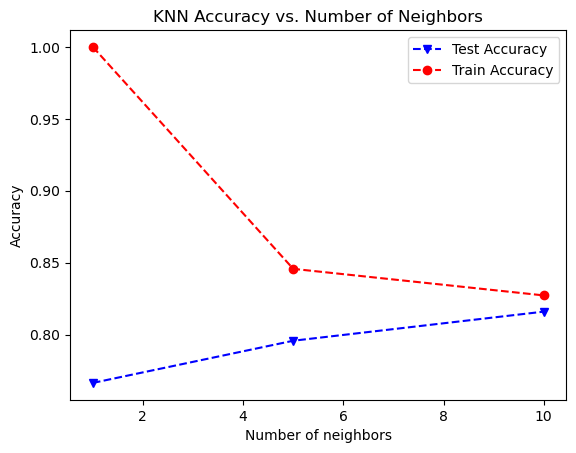

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train) 
    knn_pred = clf.predict(X_test) 
    knn_pred_train = clf.predict(X_train)
    testAcc.append(accuracy_score(y_test, knn_pred)) 
    trainAcc.append(accuracy_score(y_train, knn_pred_train))  

plt.plot(numNeighbors, testAcc, 'bv--', numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy']) 
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()

## Support Vector Machines (SVM) - Maddie

We use SVM in high-dimensional spaces because of its ability to handle non-linear classification problems efficiently through kernel functions. It offers a strong theoretical guarantee and is memory-efficient due to use of the support vectors.

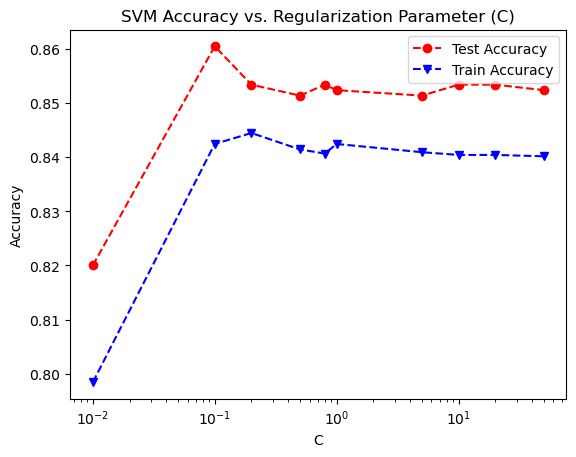

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []

for param in C:
    clf = SVC(C=param, kernel='linear')
    clf.fit(X_train, y_train)  
    svml_pred = clf.predict(X_test) 
    svml_pred_train = clf.predict(X_train)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y_train, svml_pred_train))

plt.plot(C, SVMLtestAcc, 'ro--', C, SVMLtrainAcc, 'bv--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy') 
plt.title('SVM Accuracy vs. Regularization Parameter (C)')
plt.show()

## Logistic Regression (Logit) - Maddie

We use Logistic Regression for binary classification tasks. It's useful when the relationship between features and target is approximately linear and when probabilistic outputs are desired.

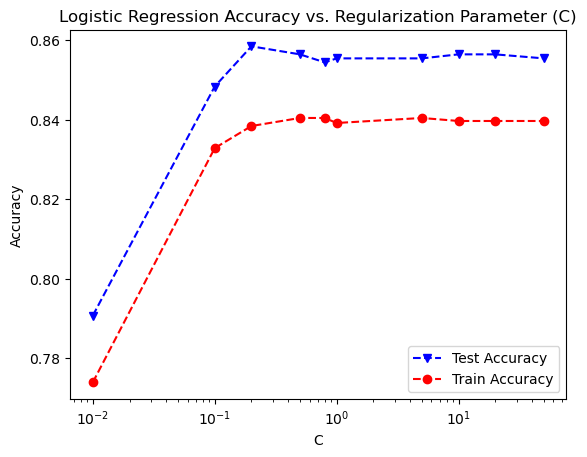

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X_train, y_train)
    log_reg_pred = clf.predict(X_test)
    log_reg_pred_train = clf.predict(X_train)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train, log_reg_pred_train))

plt.plot(C, LRtestAcc, 'bv--', C, LRtrainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Regularization Parameter (C)')
plt.show()